In [3]:
#importing libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading data
datafile = open('lattice20.pickle','rb')
data = pickle.load(datafile)
datafile.close()

datafile = open('label20.pickle','rb')
labes = pickle.load(datafile)
datafile.close() 

In [5]:
# temperature range
t = np.arange(0.1,5.0,0.025)
T = []
for i in t:
    T = np.hstack((T,i*np.ones(300)))

In [6]:
# taking 1000 sample randomly
x = np.arange(len(data))
it = np.random.choice(x,size=1000,replace=False)

datak = data[it]                   
lab = labes[it]
T = T[it]

In [7]:
# principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)               
pca.fit(data)
newdata = pca.transform(datak)

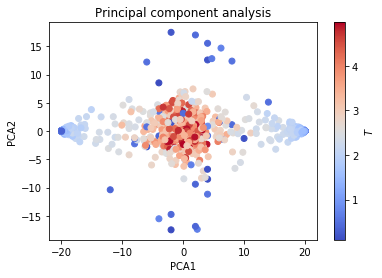

In [8]:
# visualising the data in 2D
plt.scatter(newdata[:,0],newdata[:,1],c=T,cmap='coolwarm')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=5)
plt.title('Principal component analysis')
plt.show()                              

In [9]:
#Kmeans algorithm to cluster the data into 3 clusters

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(newdata)

In [10]:
print(km.cluster_centers_)

[[-7.37048227e-02  6.87086399e-02]
 [ 1.85496380e+01  9.69326973e-02]
 [-1.88358548e+01 -1.50919635e-02]]


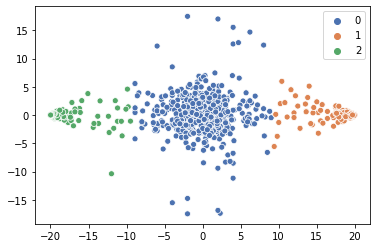

In [11]:
# clustering the data
sns.scatterplot(newdata[:,0],newdata[:,1],hue=km.labels_,palette='deep')

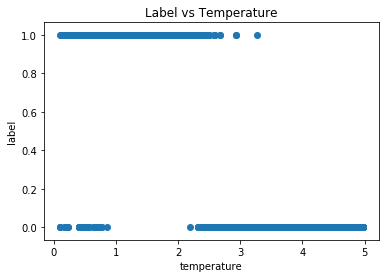

In [12]:
# plotting label vs temperature
labels = []
for l in km.labels_:
    if(l==0):
        labels.append(0)
    if(l==2 or l==1):
        labels.append(1)

plt.scatter(T,labels)
plt.title('Label vs Temperature')
plt.xlabel('temperature')
plt.ylabel('label')
plt.show()

In [20]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9,min_samples=10).fit(newdata)

In [21]:
label_db = db.labels_
print(set(label_db))

{0, 1, 2, -1}


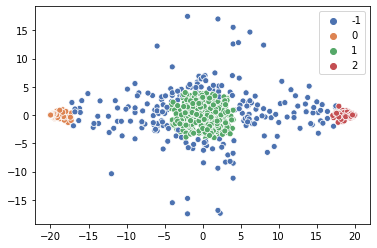

In [22]:
sns.scatterplot(newdata[:,0],newdata[:,1],hue=db.labels_,palette='deep')

785 785


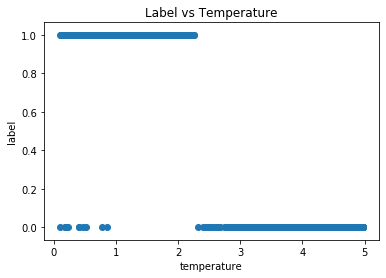

In [23]:
# plotting label vs temperature
labels_db = []
t = []
i = 0
for l in db.labels_:
    if(l==1):
        labels_db.append(0)
        t.append(T[i])
    if(l==0 or l==2):
        labels_db.append(1)
        t.append(T[i])
    i += 1
print(len(labels_db),len(t))

plt.scatter(t,labels_db)
plt.title('Label vs Temperature')
plt.xlabel('temperature')
plt.ylabel('label')
plt.show()
